## Chapter 6

*Notes*
* see "utilities.py" for implementations and unit-testing of methods used throughout this notebook.

In [117]:
import sys
sys.path.append("..")

In [118]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_latex='mathjax')
from importlib import reload
import Ch3.utilities as ch3_utils
reload(ch3_utils)

<module 'Ch3.utilities' from '../Ch3/utilities.py'>

In [119]:
import Ch6.utilities as ch6_utils
reload(ch6_utils)

<module 'Ch6.utilities' from '../Ch6/utilities.py'>

### Problem 6.1

#### a)

The desired poles are at $s = -25, -4, $ and $-2 \pm j 2\sqrt{3}$.

In [120]:
# using constants from Problem 3.6
m, M, l, g, k, R, r = .1, 1., 1., 9.8, 1., 100., .02
A = Matrix([[0., 1., 0., 0.], 
            [0., -k**2 / (M*r**2*R), -(m*g)/M, 0.], 
            [0., 0., 0., 1.], 
            [0, k**2 / (M*r**2*R*l), ((M+m)*g)/(M*l), 0.]])
B = Matrix([[0.],[k/(M*R*r)],[0.],[-k/(M*R*r*l)]])
C = Matrix([[1., 0., 0., 0.]])
D = zeros(1, 1)
Phi = ch3_utils.computeResolvent(A, imag=False, smplfy=True)
pprint(Phi)

⎡                 ⎛                    2                            ⎞         
⎢1.0     0.001936⋅⎝0.0927643784786641⋅s  + 0.210828132906055⋅s - 1.0⎠   0.044 
⎢───  - ───────────────────────────────────────────────────────────── + ───── 
⎢ s                          3                      2                     s   
⎢       0.00408163265306122⋅s  + 0.102040816326531⋅s  - 0.044⋅s - 1.0         
⎢                                                                             
⎢                             ⎛                    2      ⎞                   
⎢                       0.044⋅⎝0.0927643784786642⋅s  - 1.0⎠                   
⎢ 0        ─────────────────────────────────────────────────────────────      
⎢                               3                      2                      
⎢          0.00408163265306122⋅s  + 0.102040816326531⋅s  - 0.044⋅s - 1.0      
⎢                                                                             
⎢                                0.102040816326531  

Now, provided the matrix $Q$ is full-rank, the gain matrix $G$ is found to be $[QW]^{-1}(\mathbf{\bar a}-\mathbf{a})$ (see `bassGura` function implemented in "utilities.py"):

In [121]:
desiredPoles = np.array([-25., -4., np.complex(-2., 2.*np.sqrt(3)), np.complex(-2., -2.*np.sqrt(3))])
G = ch6_utils.bassGura(np.array(A), np.array(B), desiredPoles)
pprint('G =')
pprint(G)

G =
[[-326.53061224 -226.32653061 -812.09061224 -242.32653061]]


So, the matrix $G$, where
\begin{eqnarray}
G = \begin{pmatrix}
-326.53061224, \ 
-226.32653061, \
-812.09061224, \
-242.32653061
\end{pmatrix}
\end{eqnarray}

transforms the open-loop plant into the closed-loop plant at the desired poles.

#### b)
This part requires looking at $\theta_r = \frac{\pi}{2}$ as an exogenous input to the system.  This system enters via the pendulum angle $\theta$.  Following Example 6F, we can change $x_3 = \theta$ to be the error signal $x_3 = \theta_r - \theta$.  $\theta_r$ is constant, so $\dot \theta_r = 0$.  The modified open-loop system with $\theta_r$ as an exogeneous input is:

\begin{eqnarray}
\mathbf{\dot x} &=& \begin{pmatrix}
0 & 1 & 0 & 0 \\
0 & -\frac{k^2}{Mr^2R} & \frac{mg}{M} & 0 \\
0 & 0 & 0 & 1 \\
0 & -\frac{k^2}{Mr^2R \ell} & \frac{M+m}{M \ell} g & 0
\end{pmatrix} \mathbf{x} + \frac{k}{MRr}\begin{pmatrix}
0 \\
1 \\
0 \\
\frac{1}{\ell}
\end{pmatrix} u + 
\begin{pmatrix}
0 \\
-\frac{mg}{M} \\
0 \\
-\frac{M+m}{M \ell}g
\end{pmatrix} \theta_r
\end{eqnarray}

where the state vector $\mathbf{x}$ is $\mathbf{x} = [x_1, \ x_2, \ e_\theta, \ \dot e_\theta]^T$.

The design process of Part a) can now be followed to find the gain matrix that transforms the characteristic polynomial to the desired form.  Now, the scalar feedforward gain $G_0$ needs to be found via the method from Section 6.4; this gain will eliminate error from a step input to the pendulum angle error.  The question did not explicitly say to follow these steps I have outlined, so I will stop here.

### Problem 6.2

In [122]:
Kv, Lv, J, Km, Omm, Kdp = 94.3, 1.0, 7900., 8.46e6, 45.9, 6.33e-6
A = np.array([[0., 1., 0., 0.], [0., 0., 1., 0.], [0., -Km/J, -(Km/J)*(Omm*J/Km), (Km/J)], [0., 0., -Kv*Kdp*J, -Lv*Kv]])
B = np.array([[0.], [0.], [0.], [Kv]])
C = np.array([[1., 0., 0., 0.]])
D = np.zeros((1, 1))

#### a)

In [123]:
desiredPoles = np.array([-10.*np.sqrt(2)*np.complex(1., 1.), -10.*np.sqrt(2)*np.complex(1., -1.), np.complex(-64.5, 69.6), np.complex(-64.5, -69.6)])

In [124]:
G = ch6_utils.bassGura(A, B, desiredPoles)
pprint('G =')
pprint(G)

G =
[[3.56664832e+01 1.85180106e+00 1.80198060e-02 1.81169366e-01]]


#### b)

The objective for $g_A$ becomes to find the desired coefficients $\bar a_i$, $i = 1, \dots, 4$ s.t.:
\begin{eqnarray}
\mathbf{qw}_3^{-1} \Delta \mathbf{a} &=& 0 \\
\mathbf{qw}_4^{-1} \Delta \mathbf{a} &=& 0
\end{eqnarray}

Where $\mathbf{qw}_i^{-1}$ is the $i$th row of $[(QW)^T]^{-1}$ and $\mathbf{\Delta a} = \mathbf{\bar a} - \mathbf{a}$, where $\mathbf{a}$ is the coefficient array of the open-loop process and $\mathbf{\bar a}$ is the unknown coefficient array.

Similarly, for $g_B$:

\begin{eqnarray}
\mathbf{qw}_2^{-1} \Delta \mathbf{a} &=& 0 \\
\mathbf{qw}_4^{-1} \Delta \mathbf{a} &=& 0
\end{eqnarray}

The design goal is to keep the two poles in the desired locations and then see how close the remaining two poles can be brought to the fast pole locations with zero $g_3, g_4$.  First, factor out a quadratic with the desired pole locations at $-10 \sqrt{2} (1 \pm j)$: 

In [125]:
coeffsFromFixedRoots = np.poly([-10.*np.sqrt(2)*np.complex(1., 1.), -10.*np.sqrt(2)*np.complex(1., -1.)])
pprint(coeffsFromFixedRoots)

[  1.          28.28427125 400.        ]


The desired closed-loop characteristic polynomial now has the form $(s^2 + 28.284s + 400)(s^2 + \chi_1 s + \chi_2)$

The desired characteristic polynomial expanded is:

\begin{eqnarray}
s^4 + (\chi_1 + 28.284) s^3 + (\chi_2 + 28.284 \chi_1 + 400) s^2 + (28.284 \chi_2 + 400 \chi_1) s + 400 \chi_2
&=& 0
\end{eqnarray}

The desired coefficients are:

\begin{eqnarray}
\mathbf{\bar a} = \begin{pmatrix}
\chi_1 + 28.284, \
28.284 \chi_1 + \chi_2 + 400, \
400 \chi_1 + 28.284 \chi_2, \
400 \chi_2
\end{pmatrix}
\end{eqnarray}

Follow the steps from Example 6F to find $\chi_1, \chi_2$: this means setting up a linear system $M \Delta \mathbf{a} = \mathbf{0}$.  The matrix $M$ are the rows of the $[(QW)^T]^{-1}$ discussed above.

In [126]:
Q = control.ctrb(A, B).astype('float')
W = np.eye(A.shape[0]).astype('float')
openLoopCoeffs = ch6_utils.computeCoeffs(ch6_utils.computePoles(A))
for i in range(W.shape[0]):
    W[i, i+1:] = openLoopCoeffs[1:-(i+1)]
M = Matrix(np.linalg.inv((Q@W).T))
c1, c2 = symbols('c1 c2')
da = Matrix([[c1 + 28.284 - 140.2], [28.284*c1 + c2 + 400. - 10449.], [28.284*c2 + 400.*c1 - 100980.], [400.*c2]])
pprint('linear system to solve:')
pprint(M[2:, :] * da)
pprint(' = ')
pprint(Matrix([[0], [0]]))

linear system to solve:
⎡-0.000174442514082865⋅c₁ + 9.90250420543058e-6⋅c₂ - 0.0486416512363089⎤
⎢                                                                      ⎥
⎣               0.0106044538706257⋅c₁ - 1.18680805938494               ⎦
 = 
⎡0⎤
⎢ ⎥
⎣0⎦


In [127]:
Asys = np.array([[-1.7444e-4, 9.9025e-6], [0.010604, 0.]])
bsys = np.array([[4.864e-2], [1.1868]])
sol = np.linalg.solve(Asys, bsys)
gACharPolyCoeffs = np.array([1., sol[0] + 28.284, 28.284*sol[0] + sol[1] + 400., 28.284*sol[1] + 400.*sol[0], 400.*sol[1]])
gACharPolyRoots = np.roots(gACharPolyCoeffs)
print('Roots of characteristic polynomial given g3, g4=0 - {}'.format(gACharPolyRoots))

Roots of characteristic polynomial given g3, g4=0 - [-55.96001509+61.25294542j -55.96001509-61.25294542j
 -14.142     +14.14227125j -14.142     -14.14227125j]


This is pretty good, let's find the gain matrix $G = [g_1, g_2, 0, 0]$ that results.

In [128]:
da = gACharPolyCoeffs - openLoopCoeffs
gA = np.array(M).dot(da[1:]).astype('float').reshape((1, 4))
pprint('gA = {}'.format(gA))

gA = [[ 2.72653436e+01  1.37120514e+00 -3.79322042e-06  4.27378292e-05]]


Close enough given rounding.  Let's try $g_B$.

In [129]:
da = Matrix([[c1 + 28.284 - 140.2], [28.284*c1 + c2 + 400. - 10449.], [28.284*c2 + 400.*c1 - 100980.], [400.*c2]])
Mslice = Matrix([M[1, :], M[3, :]])
pprint('linear system to solve:')
pprint(Mslice * da)
pprint(' = ')
pprint(Matrix([[0], [0]]))

linear system to solve:
⎡-0.00664345218845344⋅c₁ + 0.000280082428946399⋅c₂ + 0.186853184720562⎤
⎢                                                                     ⎥
⎣              0.0106044538706257⋅c₁ - 1.18680805938494               ⎦
 = 
⎡0⎤
⎢ ⎥
⎣0⎦


In [130]:
Asys = np.array([[-6.6435e-3, 2.80082e-4], [0.010604, 0.]])
bsys = np.array([[-.18685], [1.1868]])
sol = np.linalg.solve(Asys, bsys)
gBCharPolyCoeffs = np.array([1., sol[0] + 28.284, 28.284*sol[0] + sol[1] + 400., 28.284*sol[1] + 400.*sol[0], 400.*sol[1]])
gBCharPolyRoots = np.roots(gBCharPolyCoeffs)
print('Roots of characteristic polynomial given g2, g4=0 - {}'.format(gBCharPolyRoots))
da = gBCharPolyCoeffs - openLoopCoeffs
gB = np.array(M).dot(da[1:]).astype('float').reshape((1, 4))
pprint('gB = {}'.format(gB))

Roots of characteristic polynomial given g2, g4=0 - [-89.78196398 +0.j         -22.1380662  +0.j
 -14.142     +14.14227125j -14.142     -14.14227125j]
gB = [[ 7.87288323e+00 -3.57369719e-05 -4.84849442e-02  4.27378292e-05]]


This doesn't work so well; the fast oscillatory poles are no longer oscillatory.  The design goal was to minimize the movement of the fast poles via placement, so the first option is better.

#### c)

Following the signal flow of the block diagram (with $G_r$ being the feedforward gain on the reference angle $\theta_r$):

\begin{eqnarray}
e(s) &=& \frac{1 - G_r H(s)}{1 + g H(s)} \theta_r(s) \\
&=& \frac{1}{1 + g H(s)} \theta_r(s) - \frac{G_r H(s)}{1 + g H(s)} \theta_r(s)
\end{eqnarray}

By linearity of limits, i.e. $\lim f + g = \lim f + \lim g$, we can consider the limit as $s \to 0$ of $s$ times each term above.  If $\lim_{s \to 0} \frac{s}{1 + gH(s)} \theta_r(s)$ is non-zero, we would need a feedforward gain from the second term above to eliminate the difference.

$\theta_r(s) = \frac{\theta_r}{s}$ is the Laplace transform of a zeroth order polynomial in time ($m=0$).  As was mentioned in the problem setup, $H(s)$ is a type-1 system ($p=1$), so it has a proper pole at $s=0$ with multiplicity 1.  From Eqn. 4.51 from the book, we see that $p > m$ and so $\lim_{s \to 0} \frac{s}{1 + gH(s)} \theta_r(s) = 0$.  Therefore, no feedforward gain is needed because there is no steady-state error introduced by the feedback: $G_r = 0$.

#### d)

In [131]:
C = np.array([1., 0., 0., 0.]).reshape((1, 4))
D = np.zeros(1)
E = np.zeros((4,3))
E[1, 0] = 1.
E[2, 1] = 1.
E[3, 2] = 1.
gainMatrices = {'Full': G, 'gA': gA, 'gB': gB}
for g in gainMatrices:
    try:
        # follow steps of Feedforward Gain stage of Example 4F
        print('############## Finding G0 for {} ##################'.format(g))
        G0 = ch6_utils.bassGuraExo(A, B, C, gainMatrices[g], E)
        pprint('G0 = {}'.format(G0))
        print('\n')
    except Exception as e:
        print(e)
        print('G0 is undefined')
        print('\n')
        continue

############## Finding G0 for Full ##################
G0 = [[0.11865374 0.00110298 0.01060445]]


############## Finding G0 for gA ##################
G0 = [[0.09286674 0.00093385 0.01060445]]


############## Finding G0 for gB ##################
G0 = [[0.04438559 0.00093385 0.01060445]]




$G_0$ is defined in all cases, so we can minimize complexity of the design by going with gain $g_A$.  This is even more true because of the feedforward gain matrices $G_0$ having the same number of non-zero elements.

### Problem 6.3

We know from Problem 5.2 that the system is controllable with either motor only.  The problem explicitly says to use motor 1, so that's cool.  We want to bring the system to rest at the origin, so the states _are_ the errors.

In [132]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]])
B = np.array([[0], [0], [1], [0]])
C = np.array([[1, 0, 0, 0]])
closedLoopPoles = np.array([np.complex(-1., -1.), np.complex(-1., 1.), np.complex(-100., -100.), np.complex(-100., 100.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles)
pprint('G =')
pprint(G)

G =
[[ 1.0122e+04 -9.1220e+03  2.0000e+00 -2.4497e+04]]


The gain is $G = [10122, \ -9122, \ 2, \ -24497]$ and the feedback law is $u = -10122 z_1 + 9122 z_2 - 2 \dot z_1 + 24497 \dot z_2$.

### Problem 6.4

This part requires looking at $V$ as an exogenous input to the system.  Following Example 6F, we can change $z_3 = \dot z_1$, $z_4 = \dot z_2$ to be the error signals $e_3 = z_3 - V$ and $e_4 = z_4 - V$.  The modified open-loop system with $V$ as an exogeneous input is:

\begin{eqnarray}
\mathbf{\dot x} &=& \begin{pmatrix}
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 \\
-40 & 40 & 100 & 0 \\
40 & -40 & 0 & 100
\end{pmatrix} \mathbf{x} + \begin{pmatrix}
0 \\
0 \\
1 \\
0
\end{pmatrix} u + 
\begin{pmatrix}
1 \\
1 \\
-100 \\
-100
\end{pmatrix} V
\end{eqnarray}

where the state vector $\mathbf{x}$ is $\mathbf{x} = [z_1, \ z_2, \ e_3, \ e_4]^T$ and the control $u$ is the motor voltage.

In [133]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, -1, 0], [0, 0, 0, -1], [-40, 40, 100, 0], [40, -40, 0, 100]])
B = np.array([[0], [0], [1], [0]])
C = np.array([[1, 0, 0, 0]])
E = np.array([[1], [1], [-100], [-100]])

sys = control.StateSpace(A, B, C, D)
closedLoopPoles =np.array([np.complex(-1., -1.), np.complex(-1., 1.), np.complex(-100., -100.), np.complex(-100., 100.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles, C, E)
pprint('[G, G0] =')
pprint(G)

[G, G0] =
[[ -50682.   51682.     402. -127917.  127515.]]


The new feedback law is $u = -G \mathbf{x} - G_0 V$, which for the $G, G_0$ found above is:

\begin{eqnarray}
u = 50682 z_1 - 51682 z_2 - 402 e_3 + 127917 e_4 - 127515 V
\end{eqnarray}

### Problem 6.5

In [134]:
A = np.array([[-1, 1, 0], [-5, -.5, 0], [0, 1, 0]])
B = np.array([[-.1], [-9], [0]])
C = np.eye(3)
D = np.zeros((3,1))
closedLoopPoles = np.array([np.complex(-2., 0.), np.complex(-1., np.sqrt(3.)), np.complex(-1., -np.sqrt(3.))])
G = ch6_utils.bassGura(A, B, closedLoopPoles)
pprint('G =')
pprint(G)

G =
[[ 0.93033864 -0.28811487 -0.94117647]]


The gain is $G = [ 0.93033864, \ -0.28811487, \ -0.94117647]$.

### Problem 6.6

#### a)

![prob6.6](block1.png)

#### b)

In [135]:
A = np.array([[-1, 1, 0, 0], [-5, -.5, 0, 0], [0, 1, 0, 0], [-1, 0, 1, 0]])
B = np.array([[-.1], [-9], [0], [0]])
C = np.array([[1, 0, 0, 0]])
D = np.zeros((4,1))
closedLoopPoles = np.array(2.5*np.array([np.complex(-0.5, 0.5*np.sqrt(3.)), np.complex(-0.5, -0.5*np.sqrt(3.)),
                                         np.complex(-0.5*np.sqrt(3.), 0.5), np.complex(-0.5*np.sqrt(3.), -0.5)]))
G = ch6_utils.bassGura(A, B, closedLoopPoles)
pprint('G =')
pprint(G)

G =
[[ 3.59461768 -0.63217653 -5.04918509 -4.59558824]]


The gain is $G = [ 3.59461768, \ -0.63217653, \ -5.04918509, \ -4.59558824]$.  If we knew the desired speed, $V$, we could find the feedforward gain on $h_0$ as well.

### Problem 6.7

#### a)

In [136]:
dr, YRoverV, YaOverV, da, gOverV, phi, YrOverV, r, YpOverV, p, YbOverV, T, b = symbols('dr YRoverV YaOverV da gOverV phi YrOverV r YpOverV p YbOverV T b', real=True)

dr = (1 / YRoverV) * (-YaOverV * da - gOverV * phi + (1 - YrOverV) * r - YpOverV * p - (YbOverV + 1 / T) * b)
Lb, Lp, Lr, La, LR, Nb, Np, Nr, Na, NR = symbols('Lb Lp Lr La LR Nb Np Nr Na NR', real=True)

bdot = YbOverV * b + YpOverV * p + (YrOverV - 1) * r + gOverV * phi + YaOverV * da + YRoverV * dr
pdot = Lb*b + Lp*p + Lr*r + La*da + LR*dr
rdot = Nb*b + Np*p + Nr*r + Na*da + NR*dr
phidot = p
pprint(simplify(bdot))  # just for verification, should = -b / T
pprint(simplify(pdot))
pprint(simplify(rdot))
pprint(simplify(phidot))

-b 
───
 T 
-LR⋅(T⋅(YaOverV⋅da + YpOverV⋅p + gOverV⋅φ + r⋅(YrOverV - 1)) + b⋅(T⋅YbOverV + 
──────────────────────────────────────────────────────────────────────────────
                                                        T⋅YRoverV             

1)) + T⋅YRoverV⋅(La⋅da + Lb⋅b + Lp⋅p + Lr⋅r)
────────────────────────────────────────────
                                            
-NR⋅(T⋅(YaOverV⋅da + YpOverV⋅p + gOverV⋅φ + r⋅(YrOverV - 1)) + b⋅(T⋅YbOverV + 
──────────────────────────────────────────────────────────────────────────────
                                                        T⋅YRoverV             

1)) + T⋅YRoverV⋅(Na⋅da + Nb⋅b + Np⋅p + Nr⋅r)
────────────────────────────────────────────
                                            
p


In [137]:
YbOverV = -.746
YpOverV = .006
YrOverV = .001
gOverV = .0369
YaOverV = .0012
YRoverV = .0092
Lb = -12.9
Lp = -.746
Lr = .387
La = 6.05
LR = .952
Nb = 4.31
Np = .024
Nr = -.174
Na = -.416
NR = -1.76
T = 0.2
A = np.array([[-LR*(YpOverV / YRoverV + Lp), -LR*((YrOverV - 1.) / YRoverV + Lr), -LR*gOverV / YRoverV],
              [-NR*(YpOverV / YRoverV + Np), -NR*((YrOverV - 1.) / YRoverV + Nr), -NR*gOverV / YRoverV],
              [1., 0., 0.]])
B = np.array([[-LR*(YaOverV / YRoverV + La)],
              [-NR*(YaOverV / YRoverV + Na)],
              [0.]])
C = np.array([[0, 0, 1]])
E = np.array([[-LR*(T*YbOverV + 1.) / (T*YRoverV)],
              [-NR*(T*YbOverV + 1.) / (T*YRoverV)],
              [0.]])
closedLoopPoles = np.array([-1., np.complex(-1., 3.), np.complex(-1., -3.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles, C, E)
pprint('[G, G0] =')
pprint(G)

[G, G0] =
[[   -2.43234778   403.19030857   -14.87746553 -1714.16334596]]


So the gain matrix $\mathbf{G} \triangleq [ G \ | \ G_0 ] = [-2.4323, 403.1903, -14.8775, -1714.1633]$ leads to a closed-loop system with the desired poles/response.

#### b)
Replacing $\phi$ with $e_\phi \triangleq \phi - \phi_0$ in the plant, where $\phi_0$ is a constant exogenous input, results in the following (slightly) modified problem:

In [138]:
A = np.array([[-LR*(YpOverV / YRoverV + Lp), -LR*((YrOverV - 1.) / YRoverV + Lr), -LR*gOverV / YRoverV],
              [-NR*(YpOverV / YRoverV + Np), -NR*((YrOverV - 1.) / YRoverV + Nr), -NR*gOverV / YRoverV],
              [1., 0., 0.]])
B = np.array([[-LR*(YaOverV / YRoverV + La)],
              [-NR*(YaOverV / YRoverV + Na)],
              [0.]])
# add neg. of third column of A to E because of \phi -> \phi - \phi_0 translation
E = np.array([[-LR*(T*YbOverV + 1.) / (T*YRoverV), LR*gOverV / YRoverV],
              [-NR*(T*YbOverV + 1.) / (T*YRoverV), NR*gOverV / YRoverV],
              [0., 0.]])
C = np.array([[0, 0, 1]])

closedLoopCoeffs = np.array([-1., np.complex(-1., 3.), np.complex(-1., -3.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles, C, E)
pprint('[G, G0] =')
pprint(G)

[G, G0] =
[[   -2.43234778   403.19030857   -14.87746553 -1714.16334596
                           14.86897684]]                     


So the gain matrix $\mathbf{G} \triangleq [ G \ | \ G_0 ] = [-2.4323, 403.1903, -14.8775, -1714.1633, 14.8690]$ leads to a closed-loop system with the desired poles/response.

It is worth noting that the _magnitude_ of the feedforward gain $G_{\phi_0} \approx 14.8690$ is approximately equal to the feedback gain on the error signal $e_\phi$.

### Problem 6.8

#### a)
Ignore any exogenous input here.  The data from Problem 3.7 is:

In [139]:
_R, _C = 2., 1.
A = np.array([[-3./(_R*_C), 1./(_R*_C), 0.],[1./(_R*_C), -2./(_R*_C), 1./(_R*_C)], [0., 1./(_R*_C), -3./(_R*_C)]])
B = np.array([[2. / (_R*_C)], [0.], [0.]])
closedLoopPoles = np.roots(np.array([1., 4., 8., 8.]))
G = ch6_utils.bassGura(A, B, closedLoopPoles)
pprint('G =')
pprint(G)

G =
[[2.22044605e-15 6.50000000e+00 6.50000000e+00]]


The gain matrix is $G = [0, \ 6.5, \ 6.5]$.  It is interesting that the gain on $v_1$ is 0.

#### b)

Replacing $v_3$ with $e = v_3 - \bar v$ and using $\mathbf{x}_0 = [v_0, \ \bar v]^T$ results in the following state space model:

In [140]:
E = np.array([[0., 0.], [0., 1./(_R*_C)], [-3./(_R*_C), 1./(_R*_C)]])
# assume observability of the final signal only
C=np.array([[0., 0., 1.]])
G = ch6_utils.bassGura(A, B, closedLoopPoles, C, E)
pprint('[G, G0] =')
pprint(G)

[G, G0] =
[[ 2.22044605e-15  6.50000000e+00  6.50000000e+00 -2.70000000e+01
                          1.05000000e+01]]                       


So the gain matrix $\mathbf{G} \triangleq [ G \ | \ G_0 ] = [0, 6.5, 38.5, -27.0, 10.5]$ leads to a closed-loop system with the desired poles/response.

#### c)

![prob6.8](block2.png)

The structure that jumps out is the fact that the feedback and feedforward terms are applied to a signal that is not part of the observed error dynamics.  What I mean is that the only non-zero entry in the $B$ matrix applies to the _only_ signal that is not present in the dynamics equation for $e$.  It is also interesting that the desired temperature/voltage feeds forward to both $v_2$ and $e$.

### Problem 6.9

#### a)

$\omega_{xE}, \omega_{yE}$ are disturbances, and $\delta_x, \delta_y$ are the signals to be regulated to 0.

From Example 3G:

In [141]:
HoverJd, KQoverJd, KDoverJd = symbols('HoverJd KQoverJd KDoverJd', real=True)
g1, g2, g3, g4 = symbols('g1 g2 g3 g4', real=True)
A = Matrix([[0., 0., 1., 0.],
            [0., 0., 0., 1.],
            [-KDoverJd, -KQoverJd, 0., -HoverJd],
            [KQoverJd, -KDoverJd, HoverJd, 0.]])
B = Matrix([[0., 0.],
            [0., 0.],
            [1., 0.],
            [0., 1.]])
G = Matrix([[g1, g2, g3, g4],
            [-g2, g1, -g4, g3]])
pprint((A-B*G))

⎡        0                   0                 1.0                 0        ⎤
⎢                                                                           ⎥
⎢        0                   0                  0                 1.0       ⎥
⎢                                                                           ⎥
⎢-KDoverJd - 1.0⋅g₁  -KQoverJd - 1.0⋅g₂      -1.0⋅g₃       -HoverJd - 1.0⋅g₄⎥
⎢                                                                           ⎥
⎣KQoverJd + 1.0⋅g₂   -KDoverJd - 1.0⋅g₁  HoverJd + 1.0⋅g₄       -1.0⋅g₃     ⎦


The closed-loop equation needs to have all eigenvalues have real part $< 0$ to be asymptotically stable.  The matrix also needs to be invertible (i.e. have full rank).  $g_3$ cannot be $0$ when $g_1 = -\frac{K_D}{J_d}, g_2 = -\frac{K_Q}{J_d}$ and $g_4 = -\frac{H}{J_d}$, simultaneously.  This doesn't seem like a huge limitation.

#### b)

In [142]:
C = Matrix([[1., 0., 0., 0.],
            [0., 1., 0., 0.]])
E = np.array([[-1., 0.],
              [0., -1.],
              [0., 0.],
              [0., 0.]])
term1 = C*((A-B*G)**(-1))
Bpound = (term1*B)**(-1)*term1
G0 = Bpound*E
pprint(G0.shape)
pprint(G0)

(2, 2)
⎡                                                                             
⎢                                                                             
⎢         - ──────────────────────────────────────────────────────────────────
⎢           ⎛                                                                 
⎢           ⎜                                              1.0⋅(-KQoverJd - 1.
⎢           ⎜─────────────────────────────────────────────────────────────────
⎢           ⎜⎛                    2                                           
⎢           ⎝⎝(-KDoverJd - 1.0⋅g₁)  - (-KQoverJd - 1.0⋅g₂)⋅(KQoverJd + 1.0⋅g₂)
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢                     ⎛                      

$G_0$ is the correct size, so I'm going to trust that the mess above is correct:  I am sure of the form of the equation for $B^*$ above, so I'm going with it.

#### c)
The control law is tuned to zero out angular error in the steady-state.  What this means is that, when there is an external disturbance $\omega_{xE}, \omega_{yE}$, the feedback command generated will serve to spin the rotors at the same rate as the external disturbances.  The measured signals $\omega_{xB}, \omega_{yB}$ then represent a measurement of the disturbances; i.e. how the gyro's exterior is rotating.

### Problem 6.10

#### a)

Butterworth polynomials are deliberately constructed to have the frequency response discussed.

\begin{eqnarray}
|H(j \omega)| &=& \sqrt{H(j \omega)H(-j \omega)} \\
&=& \frac{1}{\sqrt{1 + \bigl ( \frac{\omega}{\omega_0} \bigr )^{2k}}}
\end{eqnarray}

The idea as to why to use this form will become clear in the next part of the problem.

#### b)

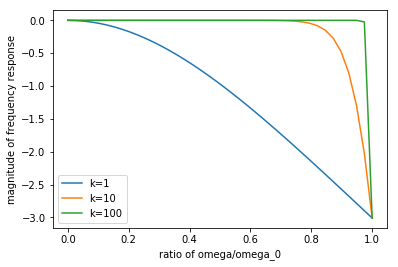

In [143]:
K = np.array([1, 10, 100])
# normalize omega_0 = 1
omega = np.linspace(0, 1, 40)
plt.figure()
for k in K:
    H = 1. / np.sqrt(1. + np.power(omega, 2.*k))
    lbl='k={}'.format(k)
    plt.plot(omega, control.mag2db(H), label=lbl)
plt.legend()
plt.xlabel('ratio of omega/omega_0')
plt.ylabel('magnitude of frequency response')
plt.show()

You can see that, for increasing $k$, the frequency response magnitude doesn't drop until the cutoff frequency, $\omega_0$.  The dropoff is so fast for $k=100$, as can be seen above, that this filter would serve as a great tool for accepting all signals with frequency $\le \omega_0$ and rejecting all frequencies $\ge \omega_0$.

#### c)

The "maximal-flatness", aside from being graphically-apparent from the chart above, can be seen as a consequence of the form of the frequency response function $|H(j \omega)|$.  There is a nice discussion in the [wikipedia](https://en.wikipedia.org/wiki/Butterworth_filter) page, so I won't bother copying it here.